In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd drive/My Drive/Colab Notebooks/experiments/data

/content/drive/My Drive/Colab Notebooks/experiments/data


In [ ]:
!pip install pandas_read_xml

     |████████████████████████████████| 337kB 4.9MB/s 


In [ ]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
import pandas_read_xml as pdx

df = pdx.read_xml('lcc/en_small.xml')

In [ ]:
df = pdx.fully_flatten(df)

In [ ]:
df.head(20)

,LCC-Metaphor-SMALL|@chain,LCC-Metaphor-SMALL|@docid,LCC-Metaphor-SMALL|@id,LCC-Metaphor-SMALL|@protagonist,LCC-Metaphor-SMALL|@targetConcept,LCC-Metaphor-SMALL|@type,LCC-Metaphor-SMALL|Annotations|AffectAnnotations|IntensityAnnotations|IntensityAnnotation|@annotatorID,LCC-Metaphor-SMALL|Annotations|AffectAnnotations|IntensityAnnotations|IntensityAnnotation|@creationTime,LCC-Metaphor-SMALL|Annotations|AffectAnnotations|IntensityAnnotations|IntensityAnnotation|@id,LCC-Metaphor-SMALL|Annotations|AffectAnnotations|IntensityAnnotations|IntensityAnnotation|@intensity,LCC-Metaphor-SMALL|Annotations|AffectAnnotations|PolarityAnnotations|PolarityAnnotation|@annotatorID,LCC-Metaphor-SMALL|Annotations|AffectAnnotations|PolarityAnnotations|PolarityAnnotation|@creationTime,LCC-Metaphor-SMALL|Annotations|AffectAnnotations|PolarityAnnotations|PolarityAnnotation|@id,LCC-Metaphor-SMALL|Annotations|AffectAnnotations|PolarityAnnotations|PolarityAnnotation|@polarity,LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@annotatorID,LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@creationTime,LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@id,LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@score,LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@sourceConcept,LCC-Metaphor-SMALL|Annotations|MetaphoricityAnnotations|MetaphoricityAnnotation|@annotatorID,LCC-Metaphor-SMALL|Annotations|MetaphoricityAnnotations|MetaphoricityAnnotation|@creationTime,LCC-Metaphor-SMALL|Annotations|MetaphoricityAnnotations|MetaphoricityAnnotation|@id,LCC-Metaphor-SMALL|Annotations|MetaphoricityAnnotations|MetaphoricityAnnotation|@score,LCC-Metaphor-SMALL|TextContent|Current|#text,LCC-Metaphor-SMALL|TextContent|Current|LmSource,LCC-Metaphor-SMALL|TextContent|Current|LmTarget,LCC-Metaphor-SMALL|TextContent|Next,LCC-Metaphor-SMALL|TextContent|Prev
0,*:prep_into,11056,21821,NaN,WEALTH,SYSTEM_VALIDATIONS,1,1401831193000,111918,2.0,1,1401831193000,111926,POSITIVE,2,1401831193000,135644,3.0,PHYSICAL_LOCATION,1,1401831193000,198818,1.0,"I, personally, do not see people who ""are "" a...",born into,wealth,Do you?,Best Answer-Chosen by Asker
1,*:prep_into,11056,21821,NaN,WEALTH,SYSTEM_VALIDATIONS,1,1401831193000,111918,2.0,2,1401831193000,111462,POSITIVE,2,1401831193000,135644,3.0,PHYSICAL_LOCATION,1,1401831193000,198818,1.0,"I, personally, do not see people who ""are "" a...",born into,wealth,Do you?,Best Answer-Chosen by Asker
2,*:prep_into,11056,21821,NaN,WEALTH,SYSTEM_VALIDATIONS,2,1401831193000,111454,2.0,1,1401831193000,111926,POSITIVE,2,1401831193000,135644,3.0,PHYSICAL_LOCATION,1,1401831193000,198818,1.0,"I, personally, do not see people who ""are "" a...",born into,wealth,Do you?,Best Answer-Chosen by Asker
3,*:prep_into,11056,21821,NaN,WEALTH,SYSTEM_VALIDATIONS,2,1401831193000,111454,2.0,2,1401831193000,111462,POSITIVE,2,1401831193000,135644,3.0,PHYSICAL_LOCATION,1,1401831193000,198818,1.0,"I, personally, do not see people who ""are "" a...",born into,wealth,Do you?,Best Answer-Chosen by Asker
4,*:prep_into,11056,21821,NaN,WEALTH,SYSTEM_VALIDATIONS,1,1401831193000,111918,2.0,1,1401831193000,111926,POSITIVE,2,1401831193000,135644,3.0,PHYSICAL_LOCATION,2,1401831193000,197846,2.0,"I, personally, do not see people who ""are "" a...",born into,wealth,Do you?,Best Answer-Chosen by Asker
5,*:prep_into,11056,21821,NaN,WEALTH,SYSTEM_VALIDATIONS,1,1401831193000,111918,2.0,2,1401831193000,111462,POSITIVE,2,1401831193000,135644,3.0,PHYSICAL_LOCATION,2,1401831193000,197846,2.0,"I, personally, do not see people who ""are "" a...",born into,wealth,Do you?,Best Answer-Chosen by Asker
6,*:prep_into,11056,21821,NaN,WEALTH,SYSTEM_VALIDATIONS,2,1401831193000,111454,2.0,1,1401831193000,111926,POSITIVE,2,1401831193000,135644,3.0,PHYSICAL_LOCATION,2,1401831193000,197846,2.0,"I, personally, do not see people who ""are "" a...",born into,wealth,Do you?,Best Answer-Chosen by Asker
7,*:prep_into

In [ ]:
en_lcc = df[['LCC-Metaphor-SMALL|@targetConcept', 'LCC-Metaphor-SMALL|@type',
             'LCC-Metaphor-SMALL|Annotations|AffectAnnotations|IntensityAnnotations|IntensityAnnotation|@intensity',
             'LCC-Metaphor-SMALL|Annotations|AffectAnnotations|PolarityAnnotations|PolarityAnnotation|@polarity',
             'LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@score',
             'LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@sourceConcept',
             'LCC-Metaphor-SMALL|Annotations|MetaphoricityAnnotations|MetaphoricityAnnotation|@score',
             'LCC-Metaphor-SMALL|TextContent|Current|#text', 'LCC-Metaphor-SMALL|TextContent|Current|LmSource',
             'LCC-Metaphor-SMALL|TextContent|Current|LmTarget', 'LCC-Metaphor-SMALL|TextContent|Next', 'LCC-Metaphor-SMALL|TextContent|Prev']]
en_lcc

In [ ]:
en_lcc

In [ ]:
en_lcc = en_lcc.rename(columns={'LCC-Metaphor-SMALL|@targetConcept': 'target_concept',
                                'LCC-Metaphor-SMALL|@type': 'type',
                                'LCC-Metaphor-SMALL|Annotations|AffectAnnotations|IntensityAnnotations|IntensityAnnotation|@intensity': 'intensity',
                                'LCC-Metaphor-SMALL|Annotations|AffectAnnotations|PolarityAnnotations|PolarityAnnotation|@polarity': 'polarity',
                                'LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@score': 'source_score',
                                'LCC-Metaphor-SMALL|Annotations|CMSourceAnnotations|CMSourceAnnotation|@sourceConcept': 'source_concept',
                                'LCC-Metaphor-SMALL|Annotations|MetaphoricityAnnotations|MetaphoricityAnnotation|@score': 'metaphoricity_score',
                                'LCC-Metaphor-SMALL|TextContent|Current|#text': 'sentence',
                                'LCC-Metaphor-SMALL|TextContent|Current|LmSource': 'lm_source',
                                'LCC-Metaphor-SMALL|TextContent|Current|LmTarget': 'lm_target',
                                'LCC-Metaphor-SMALL|TextContent|Next': 'text_context_next',
                                'LCC-Metaphor-SMALL|TextContent|Prev': 'text_context_prev'})

In [ ]:
en_lcc.to_csv('en_lcc.csv', index=False)

In [ ]:
en_lcc_subset = en_lcc[['sentence', 'text_context_next', 'text_context_prev', 'metaphoricity_score', 'polarity', 'intensity', 'source_concept', 'target_concept']]

In [ ]:
en_lcc_subset = en_lcc_subset.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
en_lcc_subset.dropna()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
en_lcc_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22094 entries, 0 to 33679
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sentence             22021 non-null  object
 1   text_context_next    20571 non-null  object
 2   text_context_prev    20705 non-null  object
 3   metaphoricity_score  22093 non-null  object
 4   polarity             9045 non-null   object
 5   intensity            9044 non-null   object
 6   source_concept       9407 non-null   object
 7   target_concept       22093 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [ ]:
en_lcc_subset.shape

(22094, 8)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


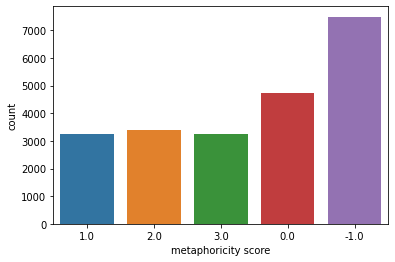

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(en_lcc_subset.metaphoricity_score)
plt.xlabel('metaphoricity score');

In [ ]:
def met_multiclass(score):
  score = float(score)
  if score == -1.0:
    return 0
  elif score == 0:
    return 0
  elif score == 1: 
    return 1
  elif score == 2:
    return 1
  elif score == 3:
    return 1

en_lcc_subset['label'] = en_lcc_subset.metaphoricity_score.apply(met_multiclass)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


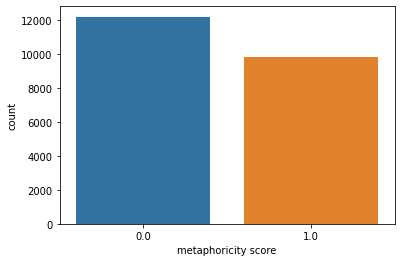

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(en_lcc_subset.label)
plt.xlabel('metaphoricity score');

In [ ]:
en_lcc_subset.isna().sum()

sentence                  73
next                    1526
prev                    1392
metaphoricity_score        1
polarity               13072
intensity              13073
source_concept         12710
target_concept             1
lm_source                  1
lm_target                  1
type                       1
label                      1
dtype: int64

In [ ]:
cd drive/My Drive/Colab Notebooks/experiments/data/Datasets

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/experiments/data/Datasets'
/content/drive/My Drive/Colab Notebooks/experiments/data


In [ ]:
en_lcc = pd.read_csv("Datasets/en_lcc_full.csv")

In [ ]:
import numpy as np
#en_lcc_subset['label'] = en_lcc_subset['label'].fillna(0).astype(np.int64)
en_lcc_subset['label'] = en_lcc_subset['label'].fillna(0).astype(np.int64)

In [ ]:
en_lcc_subset = en_lcc_subset.drop(['metaphoricity_score'], axis=1)

In [ ]:
en_lcc_subset.to_csv('en_lcc_new.csv', index=False)

In [ ]:
en_lcc_new = pd.read_csv("en_lcc_new.csv")

In [ ]:
en_lcc_new.head()

,sentence,text_context_next,text_context_prev,polarity,intensity,source_concept,target_concept,label
0,"I, personally, do not see people who ""are "" a...",Do you?,Best Answer-Chosen by Asker,POSITIVE,2.0,PHYSICAL_LOCATION,WEALTH,1
1,"I, personally, do not see people who ""are "" a...",Do you?,Best Answer-Chosen by Asker,POSITIVE,2.0,PHYSICAL_LOCATION,WEALTH,1
2,"Now if you ""eliminate those who already have t...","""Thank you Sherlock Holmes we were all wonderi...","Under my opponent's plan, 58.5% of the populat...",POSITIVE,2.0,ABYSS,POVERTY,1
3,"Now if you ""eliminate those who already have t...","""Thank you Sherlock Holmes we were all wonderi...","Under my opponent's plan, 58.5% of the populat...",POSITIVE,2.0,NATURAL_PHYSICAL_FORCE,POVERTY,1
4,"""I never imagined I'd be put in jail for takin...","But Solis, while agreeing Abdulquader's lesser...","Later, Abdulqader told the court that he was m...",NEGATIVE,3.0,CONFINEMENT,POVERTY,1


In [ ]:
#en_lcc_subset = en_lcc_subset.drop(['metaphoricity_score'], axis=1)

In [ ]:
en_lcc_subset.to_csv('en_lcc_full.csv', index=False)

In [ ]:
import pandas as pd
en_lcc_lang = pd.read_csv("LCC_English/en_lcc_label.csv")

In [ ]:
en_lcc_lang["language"] = "english"

In [ ]:
en_lcc_lang.head()

,sentence,label,language
0,"I, personally, do not see people who ""are "" a...",1,english
1,"I, personally, do not see people who ""are "" a...",1,english
2,"Now if you ""eliminate those who already have t...",1,english
3,"""I never imagined I'd be put in jail for takin...",1,english
4,If Rep. Ryan is unable or unwilling to fill hi...,1,english


In [ ]:
en_lcc_lang.to_csv("en_lcc_lang.csv", index=False)

In [ ]:
cd ..

/content/drive/My Drive/Colab Notebooks/experiments/data


In [ ]:
mohx_lang = pd.read_csv("moh-x.csv")

In [ ]:
mohx_lang["language"] = "english"

In [ ]:
mohx_lang.head()

,arg1,arg2,verb,sentence,verb_idx,label,language
0,knowledge,NaN,absorb,He absorbed the knowledge or beliefs of his t...,1,1,english
1,cost,NaN,absorb,He absorbed the costs for the accident .,1,1,english
2,tax,NaN,absorb,The sales tax is absorbed into the state inco...,4,1,english
3,immigrant,NaN,absorb,The immigrants were quickly absorbed into soc...,4,1,english
4,interest,NaN,absorb,Her interest in butterflies absorbs her compl...,4,1,english


In [ ]:
mohx_lang.to_csv("mohx_lang.csv")